# Contents
### Import/Setup
### Useful Characteristics for Random Forest
### Bar Charts
### New Subset, New Forest
### Best Indicator for Pleasant Days?

# Import/Setup

## Import

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import classification_report

In [38]:
path = r'C:\Users\rubix\Downloads\Machine Learning 2'

In [39]:
df_weather_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_cleaned.csv'), index_col = False)

In [40]:
df_weather_cleaned

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,4,1.0263,0.98
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,1.00
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.85
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,1.0142,1.13,0.41,3.4,10.7,7.9,13.5,3,1.0263,0.94


In [41]:
df_pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [42]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Merge for Filtering
I don't have a date column in the "cleaned" data so I need it back. *sigh* And then delete it again. Cool.

### Weather Data

In [43]:
# Load original data to get DATE column
df_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
df_weather_cleaned['DATE'] = df_original['DATE']

# Filter to 1980s
df_weather_cleaned_1980s = df_weather_cleaned[df_weather_cleaned['DATE'].astype(str).str.startswith('198')]

# Drop Date column
df_weather_cleaned_1980s = df_weather_cleaned_1980s.drop(columns=['DATE'])

In [44]:
df_weather_cleaned_1980s

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
7305,6,0.83,1.0180,0.40,0.01,1.6,-0.8,-4.4,1.2,5,...,1.0130,0.17,0.05,0.0,4.4,2.1,6.0,3,1.0276,0.64
7306,5,0.84,1.0180,0.34,0.09,0.9,-1.7,-4.0,0.6,7,...,1.0195,0.12,1.48,0.0,6.4,1.0,11.5,3,1.0333,0.55
7307,8,0.80,1.0180,0.44,0.07,2.0,-0.6,-3.7,1.3,8,...,1.0058,0.13,0.60,0.0,9.2,6.2,12.2,1,1.0415,0.68
7308,8,0.94,1.0180,0.18,0.43,0.0,-0.9,-2.2,2.2,5,...,1.0034,0.30,0.50,1.5,7.7,5.8,9.2,2,1.0396,0.69
7309,8,0.90,1.0180,0.25,0.26,0.2,3.0,0.5,5.3,3,...,1.0134,0.22,0.03,0.1,7.6,6.1,9.5,7,1.0273,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,6,0.87,1.0157,0.49,0.00,4.0,-0.9,-2.4,1.8,7,...,1.0105,0.22,0.12,0.1,6.0,1.8,10.1,7,1.0264,0.93
10954,3,0.84,1.0196,0.54,0.00,6.4,-1.1,-2.8,1.8,7,...,1.0134,0.18,0.05,0.3,9.3,7.5,11.0,3,1.0298,0.83
10955,4,0.85,1.0224,0.52,0.00,5.5,-1.7,-4.5,1.3,8,...,1.0110,0.12,1.10,0.0,10.1,8.8,11.4,2,1.0361,0.83
10956,0,0.83,1.0233,0.57,0.00,6.6,-2.1,-4.3,1.6,8,...,1.0138,0.16,0.49,0.1,9.9,8.2,10.8,8,1.0343,0.80


### Pleasant Data

In [45]:
df_pleasant_1980s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('198')]

In [46]:
df_pleasant_1980s

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,19800101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,19800102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,19800103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,19800104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,19800105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,19891228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,19891229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,19891230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Prep for Random Forest

In [47]:
X = df_weather_cleaned_1980s.to_numpy()
y = df_pleasant_1980s.drop(columns=['DATE']).to_numpy()

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3653, 135)
y shape: (3653, 15)


# Useful Characterstics for Random Forest

In [48]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
clf.fit(X_train, y_train)

# Check accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Training accuracy: 0.9038
Test accuracy: 0.5910


In [49]:
# Make predictions
y_pred = clf.predict(X_test)

# Get per-station accuracy
print("Per-station classification report:")
print(classification_report(y_test, y_pred))

Per-station classification report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       156
           1       0.85      0.94      0.89       232
           2       0.90      0.95      0.92       237
           3       0.91      0.91      0.91       140
           4       0.95      0.86      0.90       158
           5       0.91      0.74      0.82       143
           6       0.89      0.89      0.89       133
           7       0.93      0.89      0.91       198
           8       0.96      0.88      0.92       153
           9       0.89      0.99      0.94       340
          10       0.87      0.87      0.87       127
          11       0.97      0.66      0.79       125
          12       0.00      0.00      0.00         0
          13       0.88      0.52      0.65       123
          14       1.00      0.08      0.14        53

   micro avg       0.90      0.85      0.88      2318
   macro avg       0.85      0.74      0.76  

c:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rubix\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rubix\anaconda3\Lib\site-package

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,           # Limit tree depth
    min_samples_split=20,   # Need at least 20 samples to split
    min_samples_leaf=10,    # Each leaf needs at least 10 samples
    random_state=42
)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Training accuracy: 0.6081
Test accuracy: 0.5581


## Plot some trees

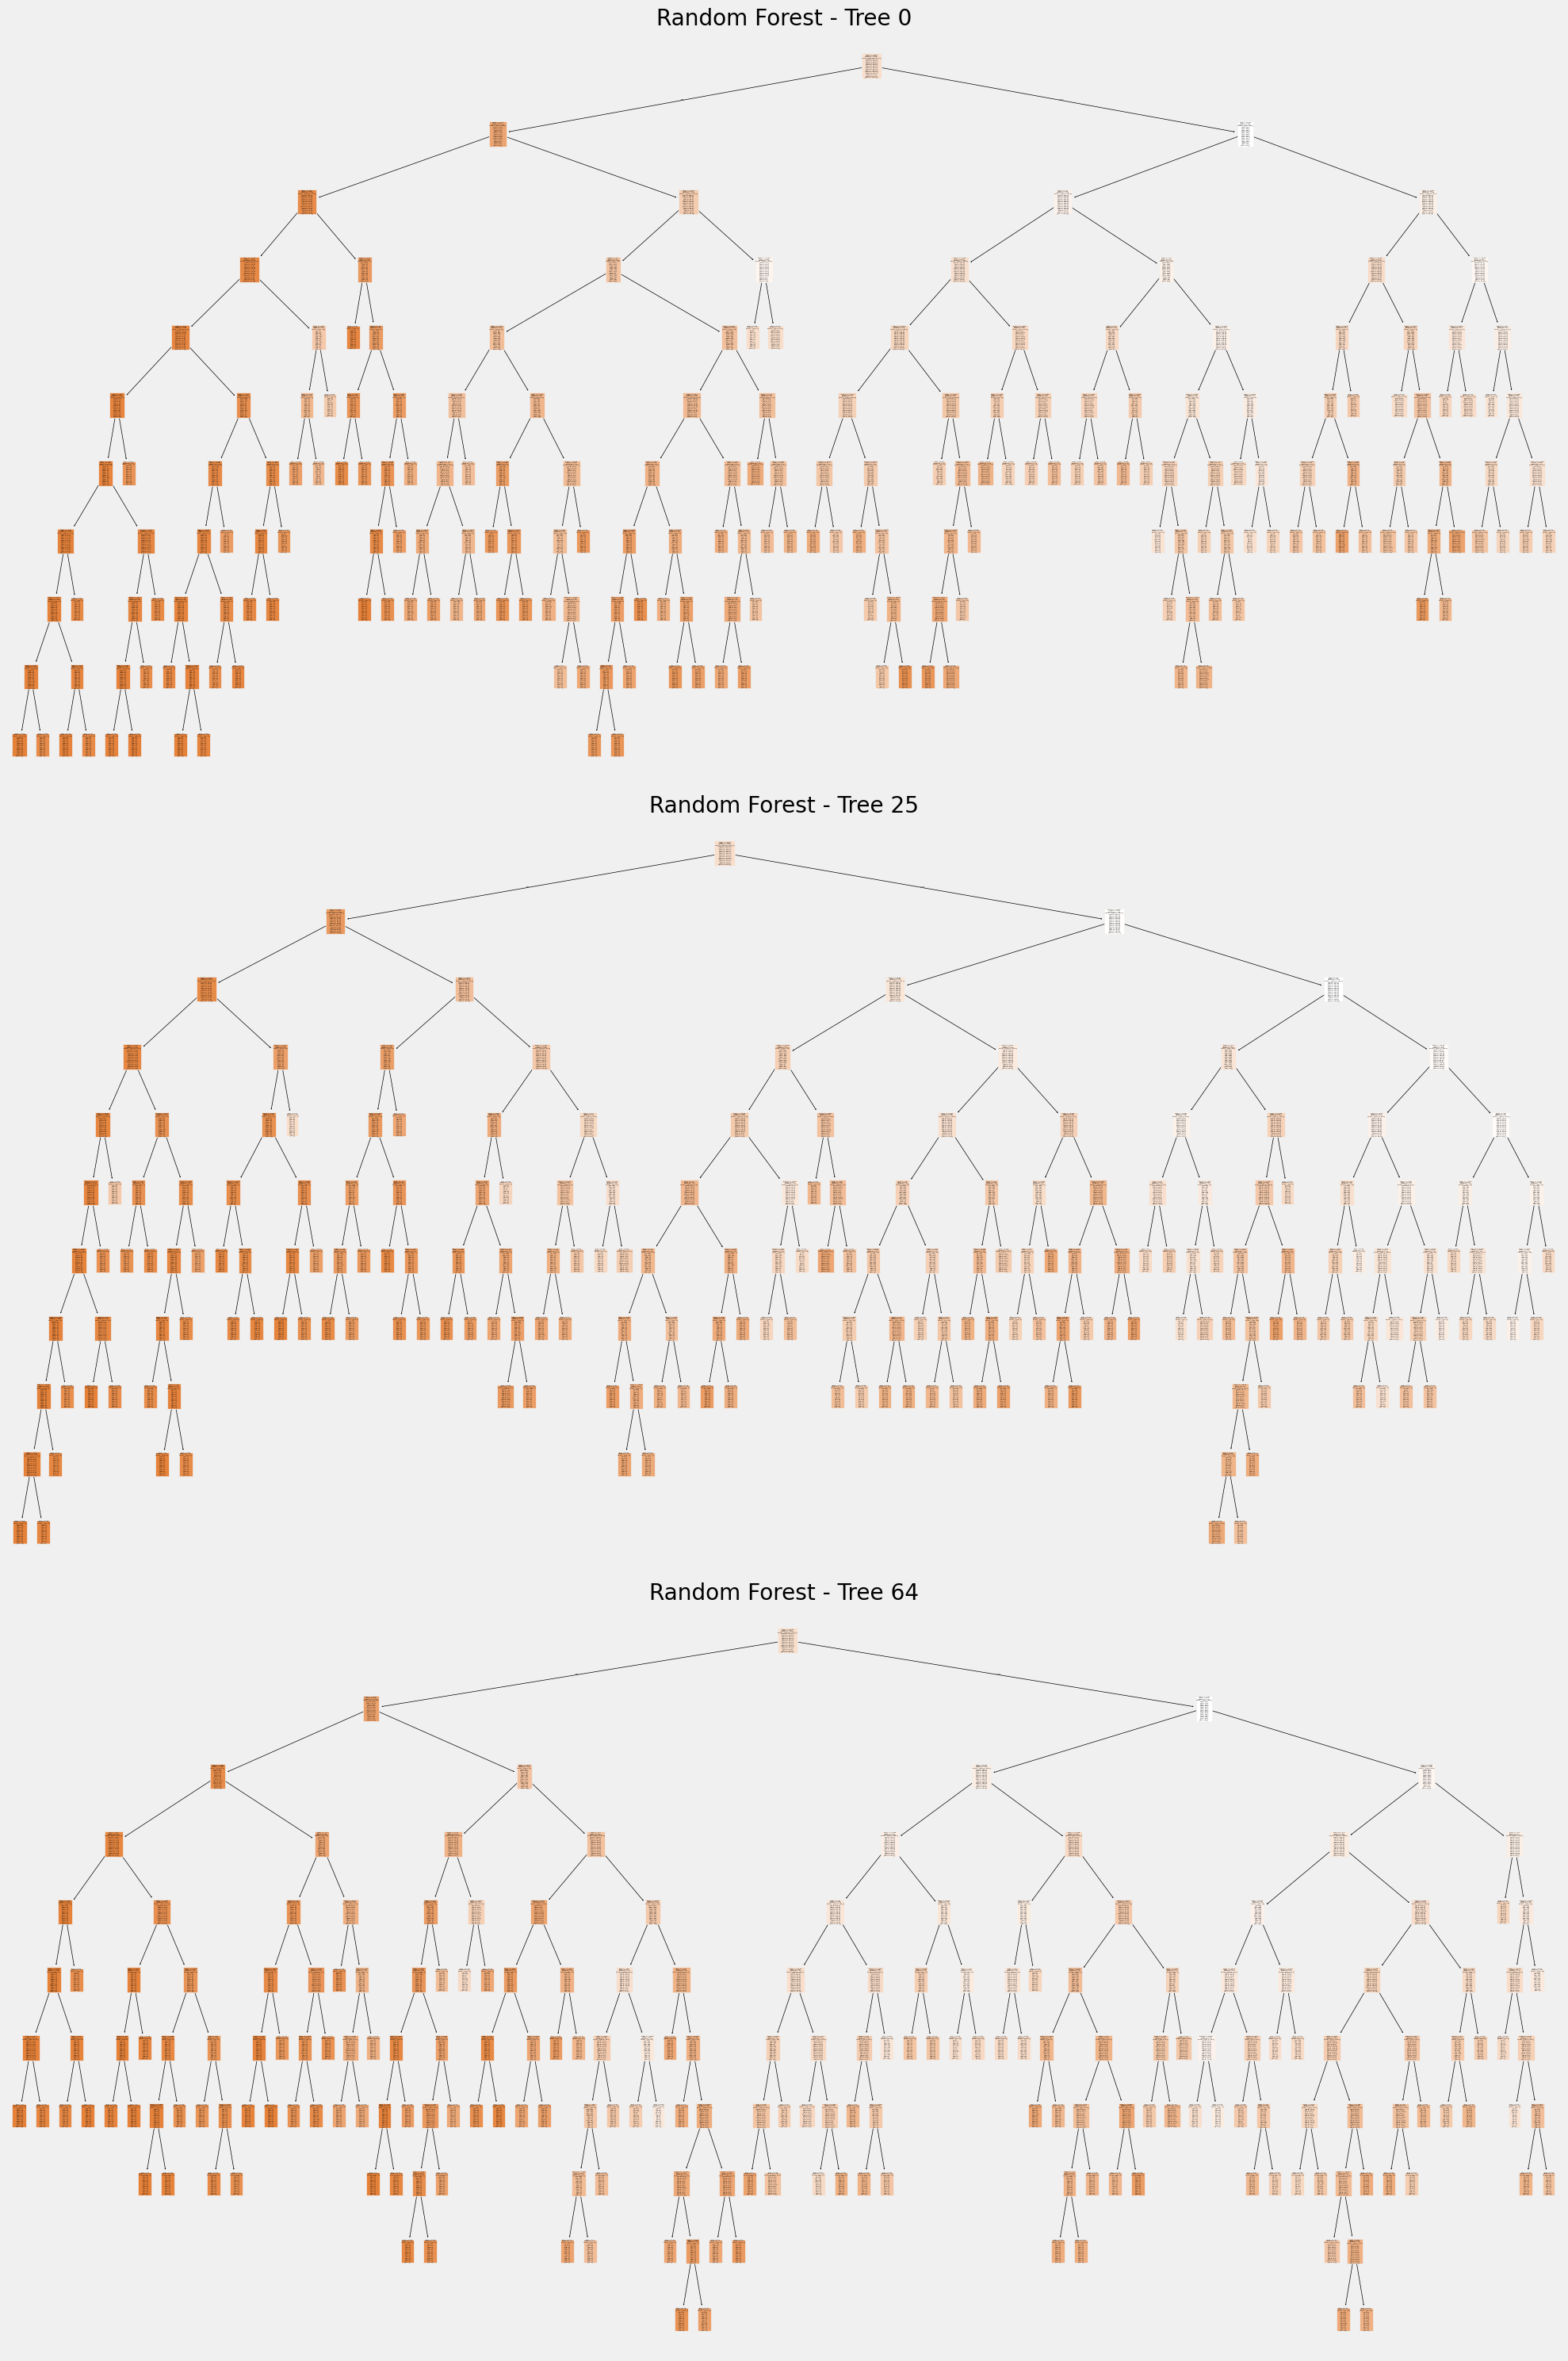

In [51]:
# Plot three different trees from the forest
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

# Tree 0
plot_tree(clf.estimators_[0], 
          max_depth=10,
          filled=True,
          ax=axes[0])
axes[0].set_title("Random Forest - Tree 0")

# Tree 1
plot_tree(clf.estimators_[25], 
          max_depth=10,
          filled=True,
          ax=axes[1])
axes[1].set_title("Random Forest - Tree 25")

# Tree 64 (picking a different one from the middle)
plot_tree(clf.estimators_[64], 
          max_depth=10,
          filled=True,
          ax=axes[2])
axes[2].set_title("Random Forest - Tree 64")

plt.tight_layout()
plt.show()

### Note

This is just the top 3 layers (based on max_depth=3) out of 10 to save on space.
Also, the accuracy was listed above already, but here it is again:

Training accuracy: 0.9911
Test accuracy: 0.9713

### Save figure

In [52]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Random Forest.png'), bbox_inches='tight')

# Bar Charts


Station importances (sorted):
MAASTRICHT: 0.1123
DUSSELDORF: 0.1114
BASEL: 0.1031
MUNCHENB: 0.0860
DEBILT: 0.0834
BUDAPEST: 0.0806
KASSEL: 0.0763
LJUBLJANA: 0.0679
MADRID: 0.0614
HEATHROW: 0.0544
BELGRADE: 0.0462
OSLO: 0.0396
STOCKHOLM: 0.0395
VALENTIA: 0.0209
SONNBLICK: 0.0169


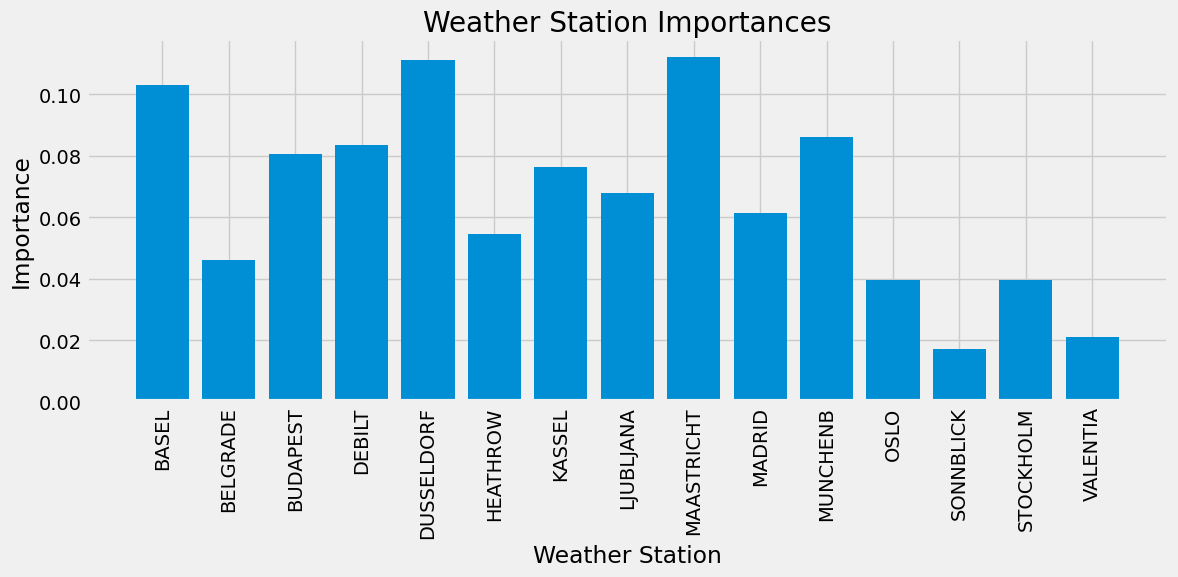

In [53]:
# Get feature importances
importances = clf.feature_importances_
importances_reshaped = importances.reshape(-1, 15, 9)
station_importances = np.sum(importances_reshaped[0], axis=1)

stations = list({x.split("_")[0] for x in df_weather_cleaned_1980s.columns})
stations.sort()

station_importance_pairs = list(zip(stations, station_importances))
station_importance_pairs.sort(key=lambda x: x[1], reverse=True)

print("\nStation importances (sorted):")
for station, importance in station_importance_pairs:
    print(f"{station}: {importance:.4f}")

# Create bar chart
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))
plt.bar(range(len(station_importances)), station_importances)
plt.xticks(range(len(station_importances)), stations, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Weather Station')
plt.title('Weather Station Importances')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weather_station_importances.png'), bbox_inches='tight')
plt.show()

# New Subset, New Forest

In [54]:
# Load the ORIGINAL (non-cleaned) weather data
df_weather_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_cleaned.csv'))
df_pleasant_all = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)


# Check what columns are available for the top 3 stations
for station in ['BASEL', 'DUSSELDORF', 'MAASTRICHT']:
    station_cols = [col for col in df_weather_original.columns if col.startswith(f'{station}_')]
    print(f"{station}: {len(station_cols)} observation types")
    print(f"  Columns: {station_cols}\n")

BASEL: 11 observation types
  Columns: ['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']

DUSSELDORF: 11 observation types
  Columns: ['DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max']

MAASTRICHT: 10 observation types
  Columns: ['MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max']



## DUSSELDORF with original data

X_dusseldorf shape: (22950, 9)
y_dusseldorf shape: (22950,)
DUSSELDORF (original) - Test accuracy: 1.0000


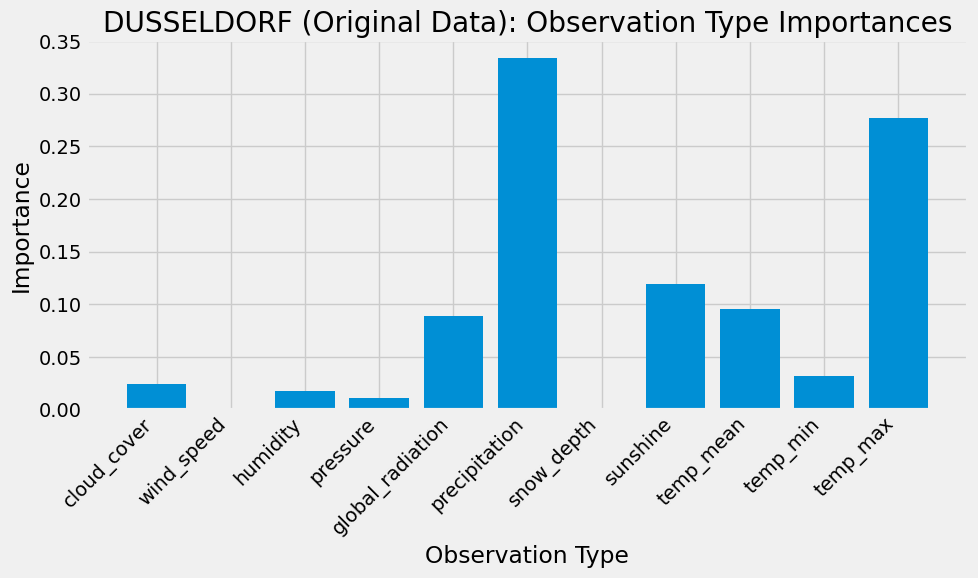


DUSSELDORF (Original) Observation importances:
cloud_cover: 0.0351
wind_speed: 0.0079
humidity: 0.0234
pressure: 0.0169
global_radiation: 0.0770
precipitation: 0.3267
snow_depth: 0.0000
sunshine: 0.0967
temp_mean: 0.1207
temp_min: 0.0250
temp_max: 0.2705


In [55]:
# Get only DUSSELDORF columns
dusseldorf_cols = [col for col in df_weather_all.columns if col.startswith('DUSSELDORF_')]

X_dusseldorf = df_weather_all[dusseldorf_cols].to_numpy()
y_dusseldorf = df_pleasant_all['DUSSELDORF_pleasant_weather'].to_numpy()

print(f"X_dusseldorf shape: {X_dusseldorf.shape}")  # Should be (22950, 9)
print(f"y_dusseldorf shape: {y_dusseldorf.shape}")  # Should be (22950,)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dusseldorf_orig, y_dusseldorf_orig, test_size=0.2, random_state=42)

clf_dusseldorf_orig = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf_dusseldorf_orig.fit(X_train_d, y_train_d)

print(f"DUSSELDORF (original) - Test accuracy: {clf_dusseldorf_orig.score(X_test_d, y_test_d):.4f}")

# Feature importances
importances_duss_orig = clf_dusseldorf_orig.feature_importances_
observation_types_duss_orig = [col.replace('DUSSELDORF_', '') for col in dusseldorf_columns_orig]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_basel_orig)), importances_basel_orig)
plt.xticks(range(len(importances_basel_orig)), observation_types_basel_orig, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('DUSSELDORF (Original Data): Observation Type Importances')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'DUSSELDORF_feature_importances.png'), bbox_inches='tight')
plt.show()

print("\nDUSSELDORF (Original) Observation importances:")
for obs, imp in zip(observation_types_duss_orig, importances_duss_orig):
    print(f"{obs}: {imp:.4f}")

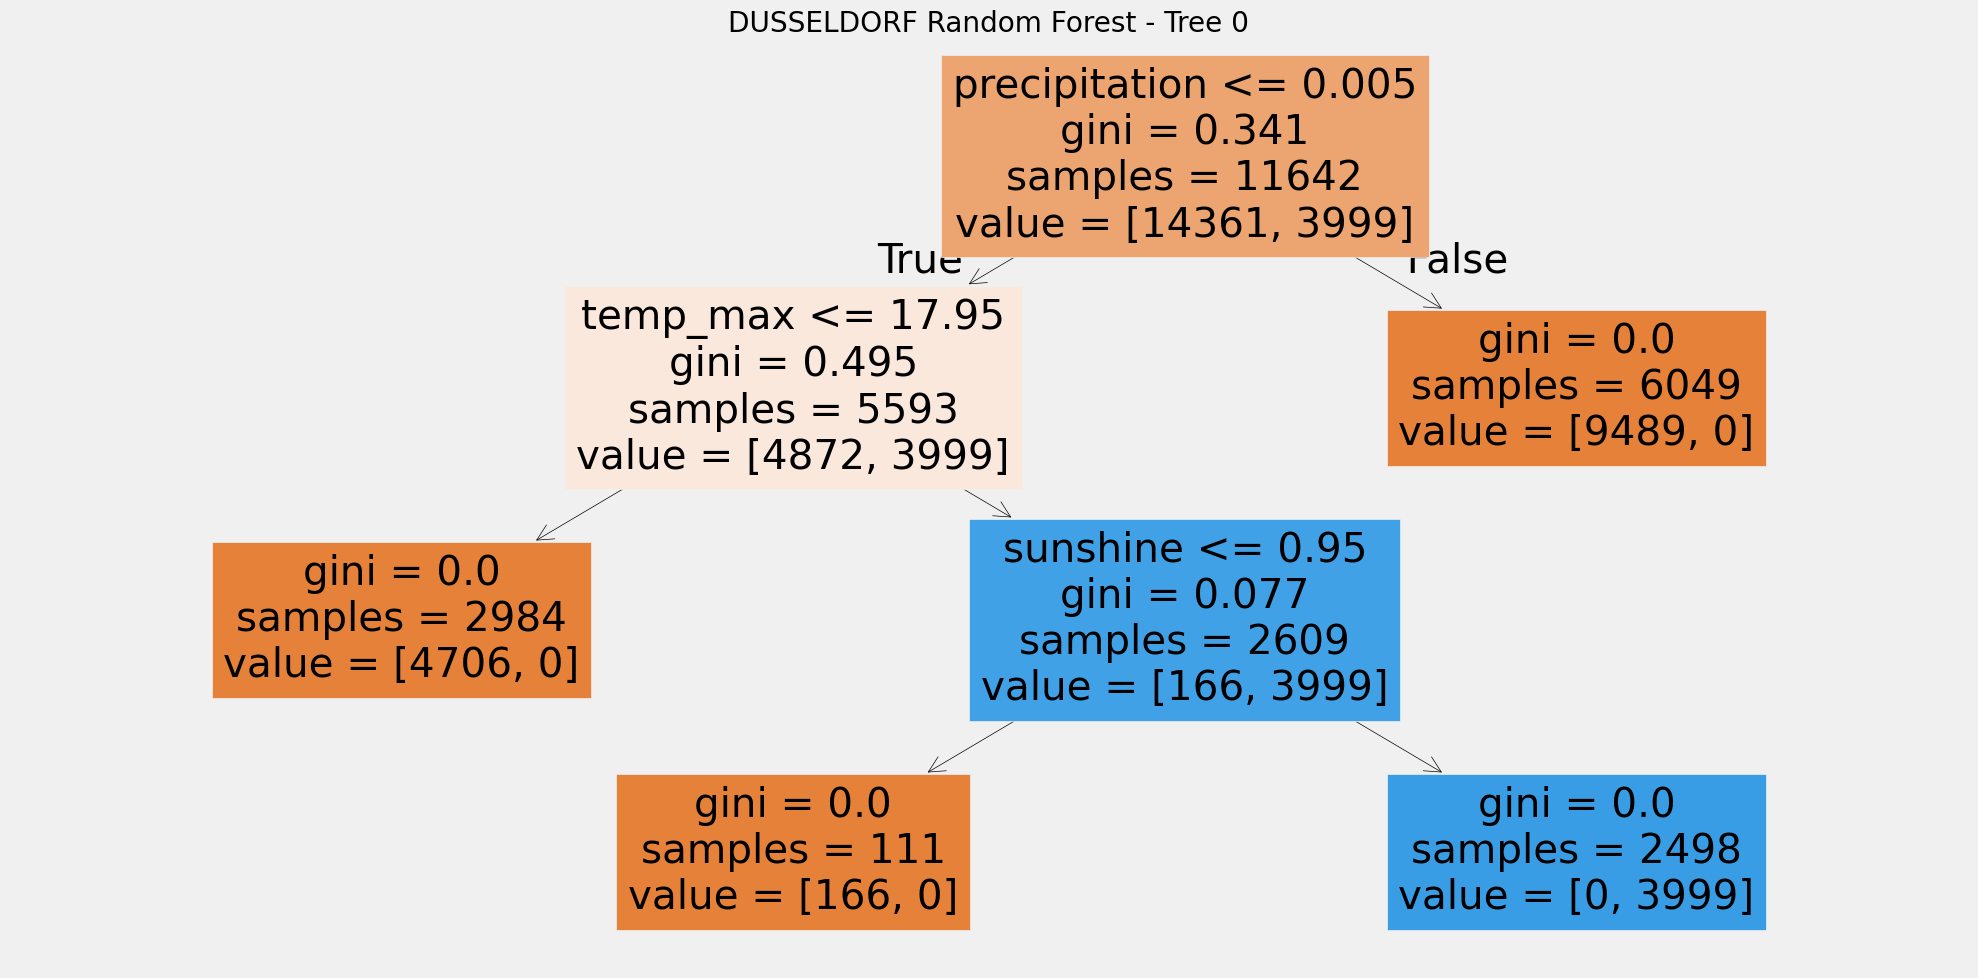

In [56]:
# DUSSELDORF tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_dusseldorf_orig.estimators_[0], 
          max_depth=3,
          filled=True,
          feature_names=observation_types_duss_orig,
          ax=ax)
ax.set_title("DUSSELDORF Random Forest - Tree 0")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'DUSSELDORF_tree.png'), bbox_inches='tight')
plt.show()

## MAASTRICHT with original data

X_maastricht shape: (22950, 10)
MAASTRICHT (original) - Test accuracy: 1.0000


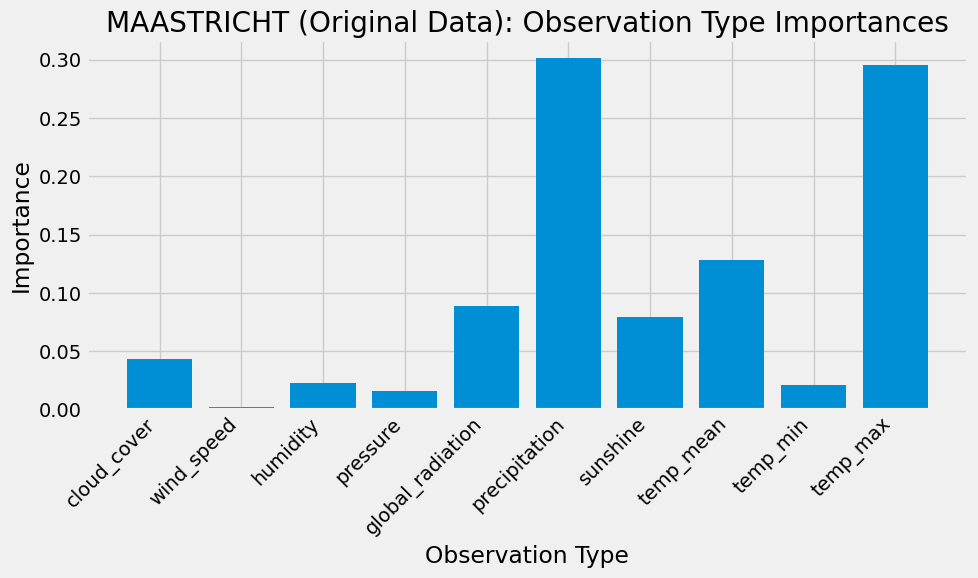


MAASTRICHT (Original) Observation importances:
cloud_cover: 0.0433
wind_speed: 0.0021
humidity: 0.0227
pressure: 0.0163
global_radiation: 0.0887
precipitation: 0.3017
sunshine: 0.0799
temp_mean: 0.1286
temp_min: 0.0208
temp_max: 0.2959


In [57]:
maastricht_cols_orig = [col for col in df_weather_original.columns if col.startswith('MAASTRICHT_')]
X_maastricht_orig = df_weather_original[maastricht_cols_orig].to_numpy()
y_maastricht_orig = df_pleasant_all['MAASTRICHT_pleasant_weather'].to_numpy()

print(f"X_maastricht shape: {X_maastricht_orig.shape}")  # Should be (22950, 10)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_maastricht_orig, y_maastricht_orig, test_size=0.2, random_state=42)

clf_maastricht_orig = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf_maastricht_orig.fit(X_train_m, y_train_m)

print(f"MAASTRICHT (original) - Test accuracy: {clf_maastricht_orig.score(X_test_m, y_test_m):.4f}")

# Feature importances
importances_maas_orig = clf_maastricht_orig.feature_importances_
observation_types_maas_orig = [col.replace('MAASTRICHT_', '') for col in maastricht_cols_orig]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_maas_orig)), importances_maas_orig)
plt.xticks(range(len(importances_maas_orig)), observation_types_maas_orig, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('MAASTRICHT (Original Data): Observation Type Importances')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'MAASTRICHT_feature_importances.png'), bbox_inches='tight')
plt.show()

print("\nMAASTRICHT (Original) Observation importances:")
for obs, imp in zip(observation_types_maas_orig, importances_maas_orig):
    print(f"{obs}: {imp:.4f}")

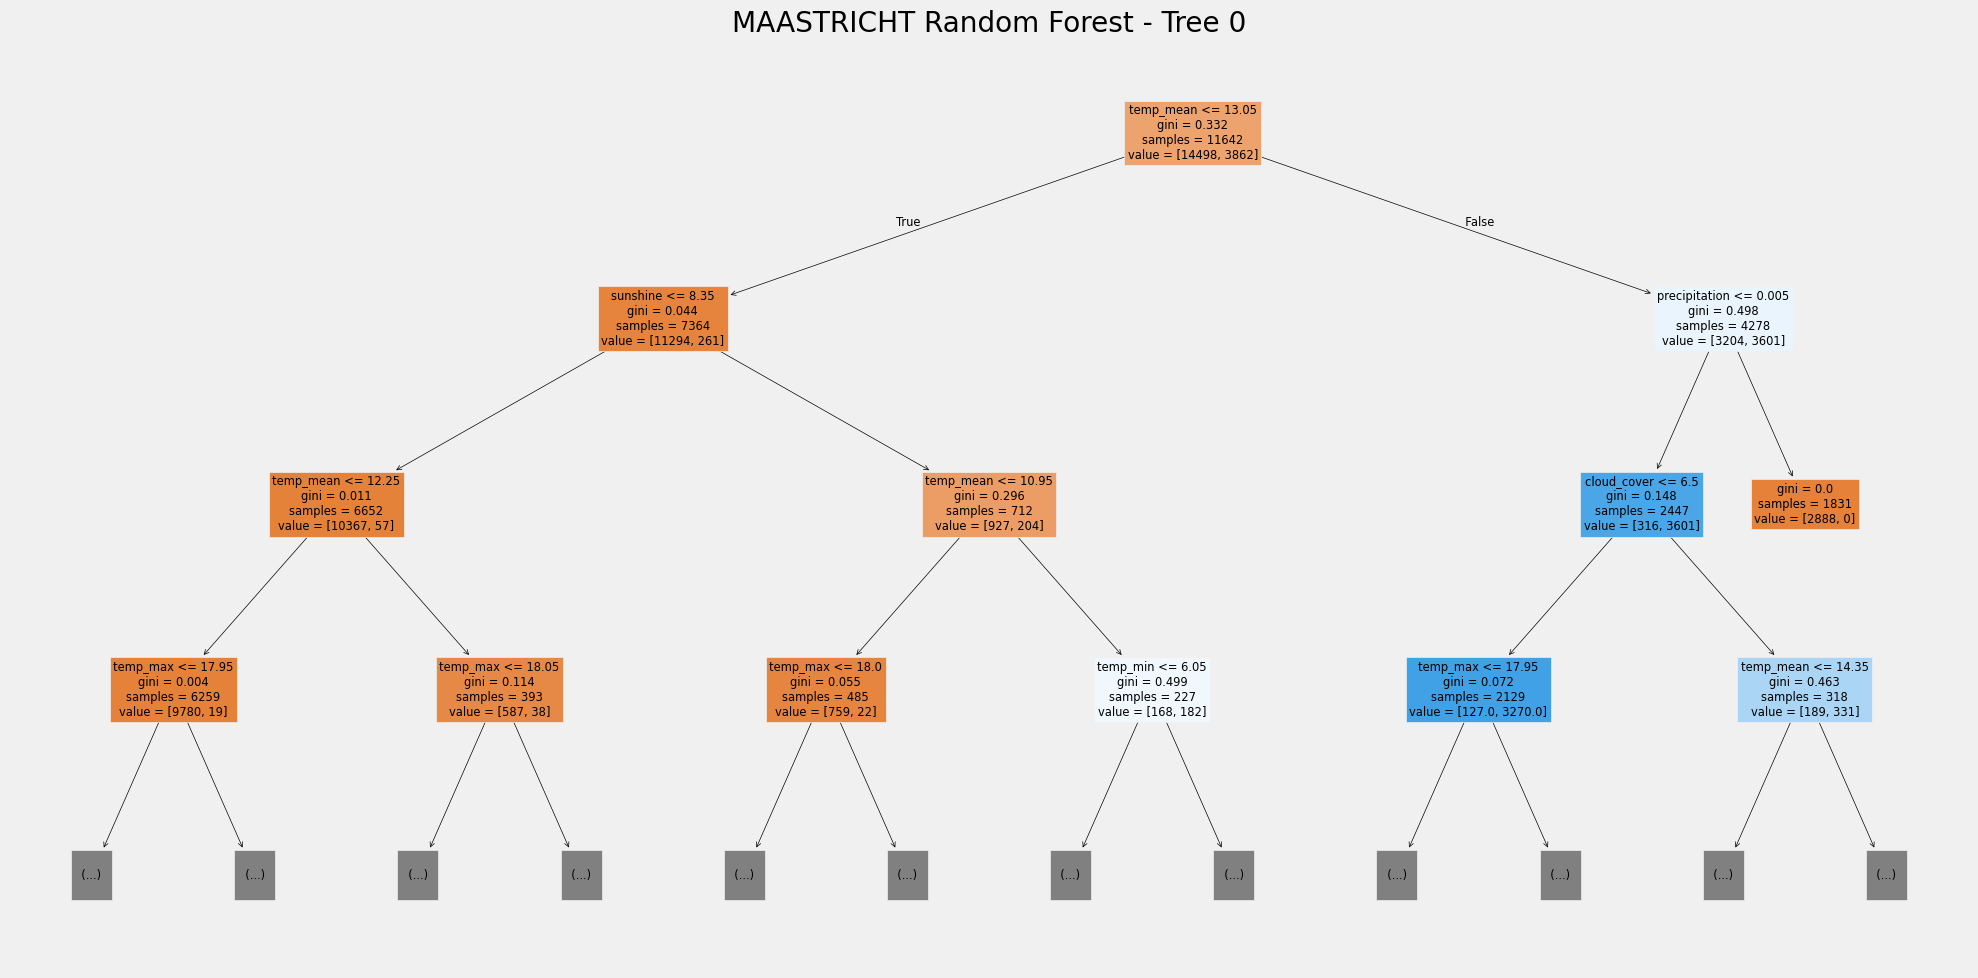

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_maastricht_orig.estimators_[0], 
          max_depth=3,
          filled=True,
          feature_names=observation_types_maas_orig,
          ax=ax)
ax.set_title("MAASTRICHT Random Forest - Tree 0")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'MAASTRICHT_tree.png'), bbox_inches='tight')
plt.show()

## BASEL with original data

X_basel shape: (22950, 11)
BASEL (original) - Test accuracy: 1.0000


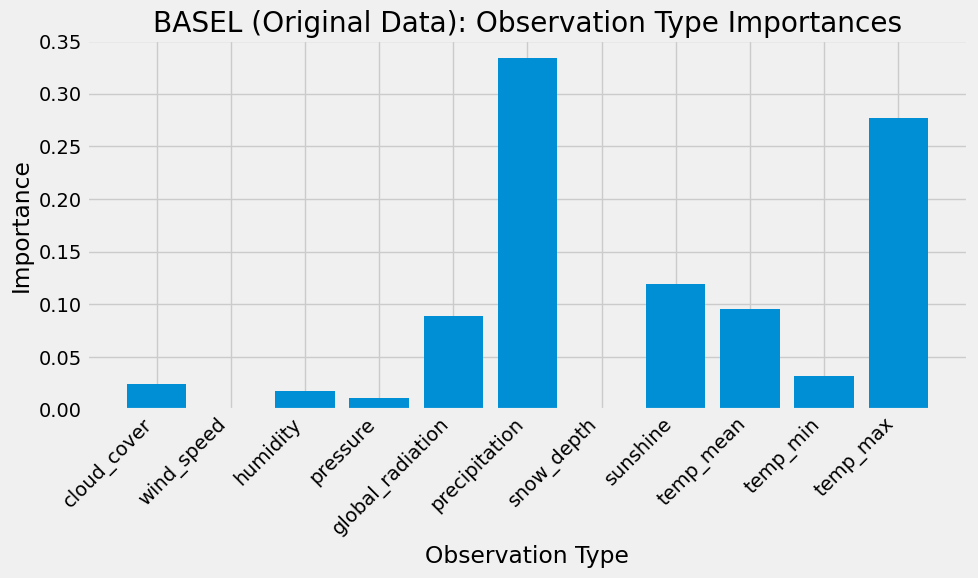


BASEL (Original) Observation importances:
cloud_cover: 0.0246
wind_speed: 0.0007
humidity: 0.0179
pressure: 0.0107
global_radiation: 0.0891
precipitation: 0.3340
snow_depth: 0.0002
sunshine: 0.1192
temp_mean: 0.0951
temp_min: 0.0317
temp_max: 0.2767


In [59]:
basel_cols_orig = [col for col in df_weather_original.columns if col.startswith('BASEL_')]
X_basel_orig = df_weather_original[basel_cols_orig].to_numpy()
y_basel_orig = df_pleasant_all['BASEL_pleasant_weather'].to_numpy()

print(f"X_basel shape: {X_basel_orig.shape}")  # Should be (22950, 11)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_basel_orig, y_basel_orig, test_size=0.2, random_state=42)

clf_basel_orig = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
clf_basel_orig.fit(X_train_b, y_train_b)

print(f"BASEL (original) - Test accuracy: {clf_basel_orig.score(X_test_b, y_test_b):.4f}")

# Feature importances
importances_basel_orig = clf_basel_orig.feature_importances_
observation_types_basel_orig = [col.replace('BASEL_', '') for col in basel_cols_orig]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_basel_orig)), importances_basel_orig)
plt.xticks(range(len(importances_basel_orig)), observation_types_basel_orig, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('BASEL (Original Data): Observation Type Importances')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'BASEL_feature_importances.png'), bbox_inches='tight')
plt.show()

print("\nBASEL (Original) Observation importances:")
for obs, imp in zip(observation_types_basel_orig, importances_basel_orig):
    print(f"{obs}: {imp:.4f}")

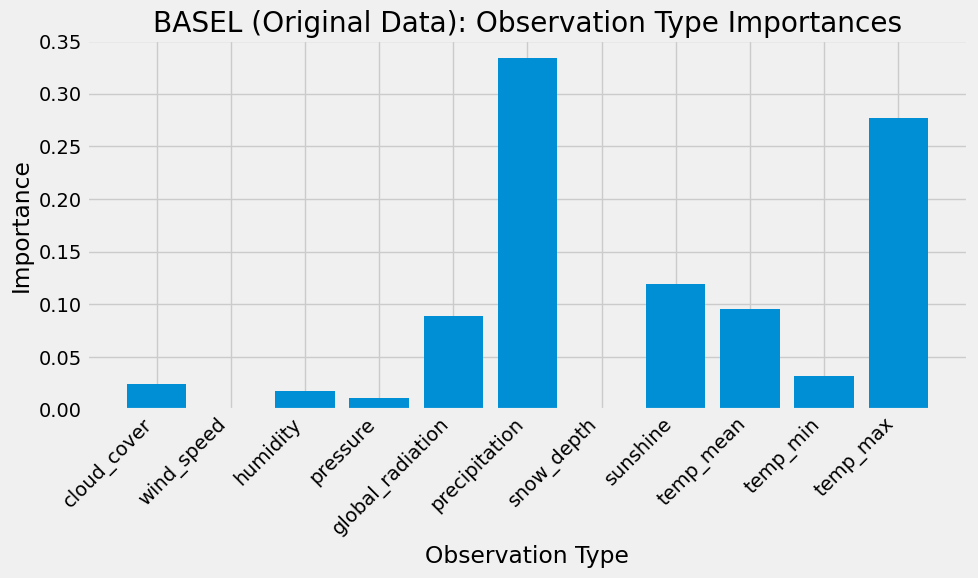


BASEL (Original) Observation importances:
cloud_cover: 0.0246
wind_speed: 0.0007
humidity: 0.0179
pressure: 0.0107
global_radiation: 0.0891
precipitation: 0.3340
snow_depth: 0.0002
sunshine: 0.1192
temp_mean: 0.0951
temp_min: 0.0317
temp_max: 0.2767


In [60]:
# Get feature importances for BASEL with original data
importances_basel_orig = clf_basel_orig.feature_importances_

# Create list of observation types
observation_types_basel_orig = [col.replace('BASEL_', '') for col in basel_columns_orig]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_basel_orig)), importances_basel_orig)
plt.xticks(range(len(importances_basel_orig)), observation_types_basel_orig, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Observation Type')
plt.title('BASEL (Original Data): Observation Type Importances')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'BASEL_feature_importances.png'), bbox_inches='tight')
plt.show()

print("\nBASEL (Original) Observation importances:")
for obs, imp in zip(observation_types_basel_orig, importances_basel_orig):
    print(f"{obs}: {imp:.4f}")

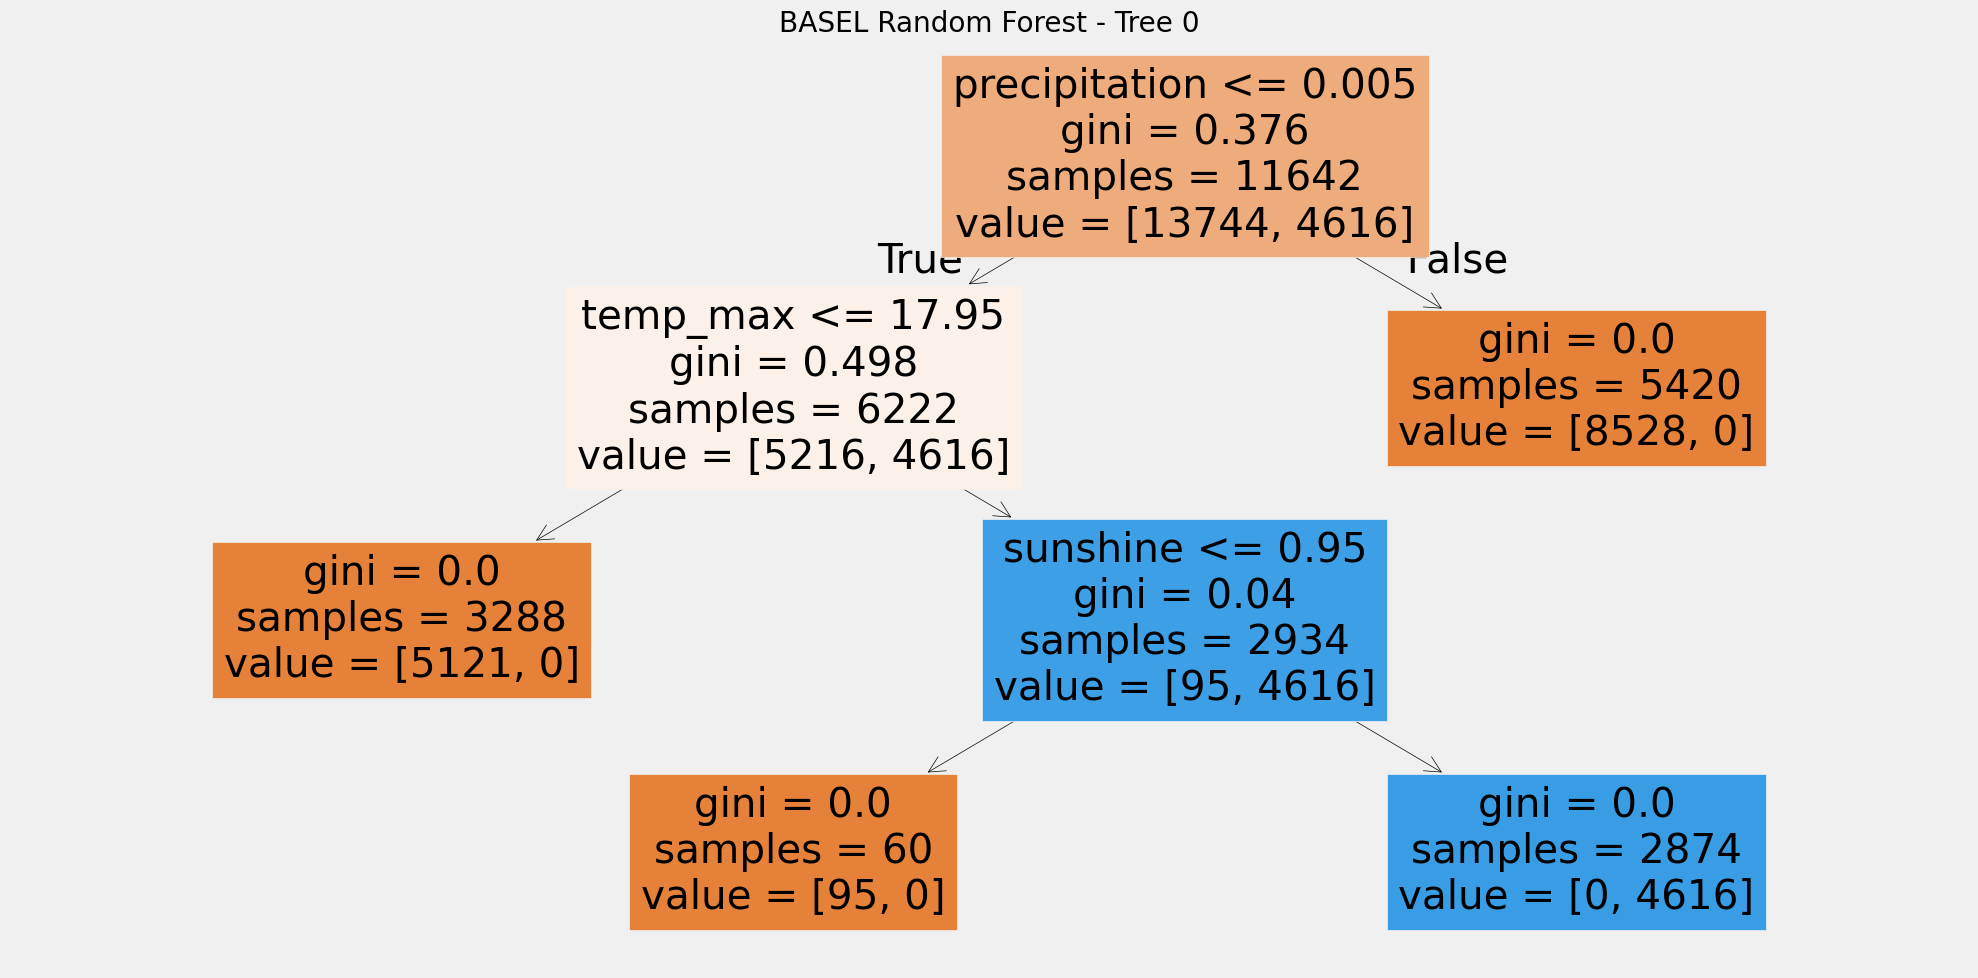

In [61]:
# BASEL tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_basel_orig.estimators_[0], 
          max_depth=3,
          filled=True,
          feature_names=observation_types_basel_orig,
          ax=ax)
ax.set_title("BASEL Random Forest - Tree 0")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'BASEL_tree.png'), bbox_inches='tight')
plt.show()

# Best Indicator for Pleasant Days?

See document for details.